   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

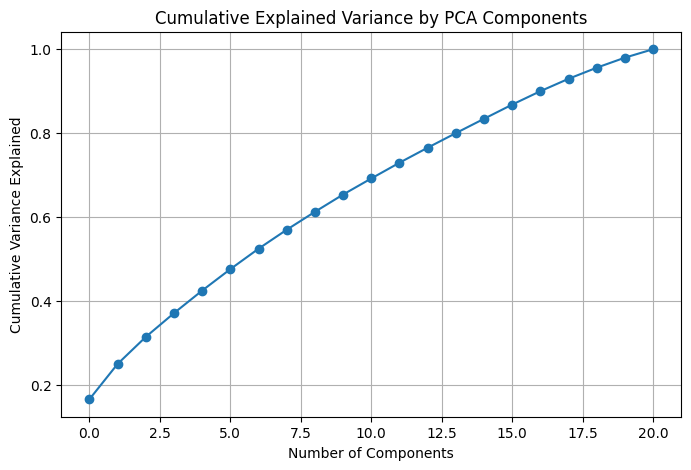

Original - Random Forest Accuracy: 0.4711644591611479
PCA - Random Forest Accuracy: 0.46870072532324186
Original - Logistic Regression Accuracy: 0.5007292652160202
PCA - Logistic Regression Accuracy: 0.49936928413749604

Comparison of Accuracy:
Random Forest (original): 0.4712
Random Forest (PCA): 0.4687
Logistic Regression (original): 0.5007
Logistic Regression (PCA): 0.4994


In [7]:
# End-to-End ML Pipeline for Diabetes Prediction

# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
import joblib

# Step 2: Load the dataset (assumes CSV file with header)
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Step 3: Explore and preprocess the data
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Step 4: Feature and target separation
X = data.drop('Education', axis=1)  # replace with correct target column name if needed
y = data['Education']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: PCA for dimensionality reduction
pca = PCA().fit(X_train_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance to choose optimal components
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

# Retain 95% variance
pca_opt = PCA(n_components=0.95)
X_train_pca = pca_opt.fit_transform(X_train_scaled)
X_test_pca = pca_opt.transform(X_test_scaled)

# Step 8: Train classifiers on original and PCA-reduced data
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[f'{name} (original)'] = acc
    print(f'Original - {name} Accuracy:', acc)

    model.fit(X_train_pca, y_train)
    y_pred_pca = model.predict(X_test_pca)
    acc_pca = accuracy_score(y_test, y_pred_pca)
    results[f'{name} (PCA)'] = acc_pca
    print(f'PCA - {name} Accuracy:', acc_pca)

# Step 9: Compare and report results
print("\nComparison of Accuracy:")
for key, val in results.items():
    print(f"{key}: {val:.4f}")


In [ ]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Save pipeline to a file
joblib.dump(pipeline, "diabetes_pipeline.pkl" ,compress =3)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1352383792.py, line 10)